In [2]:
pip install keras scikit-learn

In [4]:
pip install tensorflow


In [5]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report

In [6]:
from keras.utils import to_categorical

In [7]:
from keras.datasets import mnist

In [8]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Visualizing the dataset

In [9]:
import matplotlib.pyplot as plt

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
single_image=x_train[56]

In [12]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  56, 105,
        220, 254,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [14]:
single_image.shape

(28, 28)

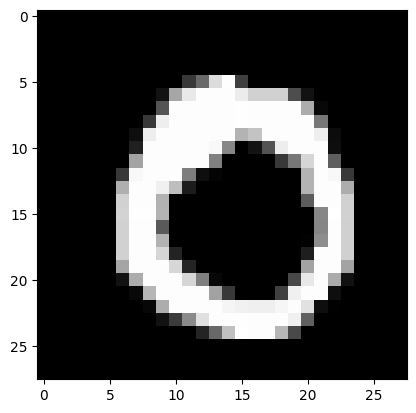

In [15]:
plt.imshow(single_image, cmap='gray')

## Pre-processing

In [16]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [17]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_train.shape

(60000,)

In [20]:
y_example=to_categorical(y_train)

In [21]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [22]:
y_example.shape

(60000, 10)

In [23]:
y_cat_train=to_categorical(y_train,10)

In [24]:
y_cat_test=to_categorical(y_test,10)

In [25]:
single_image.max()

255

In [26]:
single_image.min()

0

In [27]:
x_train=x_train/255
x_test=x_test/255

In [28]:
scaled_image=x_train[0]


In [29]:
scaled_image.max()

1.0

In [30]:
scaled_image.min()

0.0

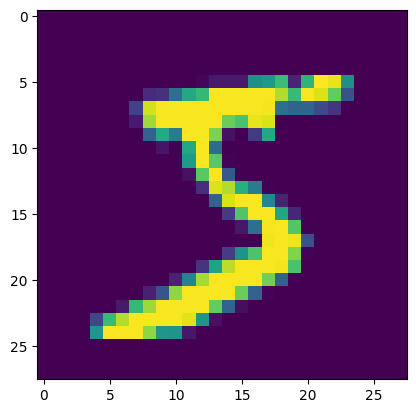

In [31]:
plt.imshow(scaled_image)

In [32]:
x_train.shape

(60000, 28, 28)

## Adding the color channel

In [33]:
x_train = x_train.reshape(60000,28,28,1)

In [34]:
x_train.shape

(60000, 28, 28, 1)

In [35]:
x_test=x_test.reshape(10000,28,28,1)

In [36]:
x_test.shape

(10000, 28, 28, 1)

## Model

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten


In [38]:
model= Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape= (28,28,1), activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [39]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [41]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1649 - accuracy: 0.9495
Epoch 2/2
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0507 - accuracy: 0.9852


In [42]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0498 - accuracy: 0.9838


[0.04977788031101227, 0.9837999939918518]

In [43]:
from sklearn.metrics import classification_report

In [44]:
import numpy as np

In [45]:
predictions=model.predict(x_test)
prediction_classes=np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 10ms/step


In [46]:
report = classification_report(y_test, prediction_classes)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

